In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

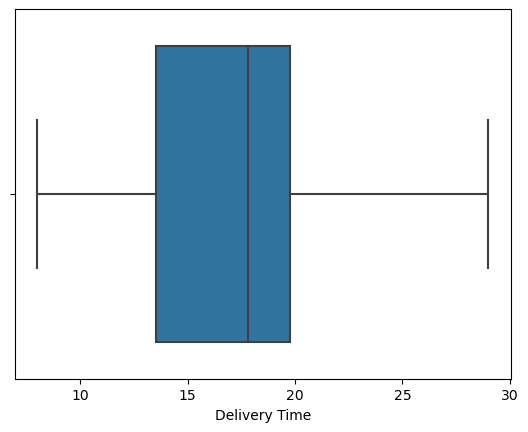

In [6]:
sns.boxplot(data['Delivery Time'])
plt.show()

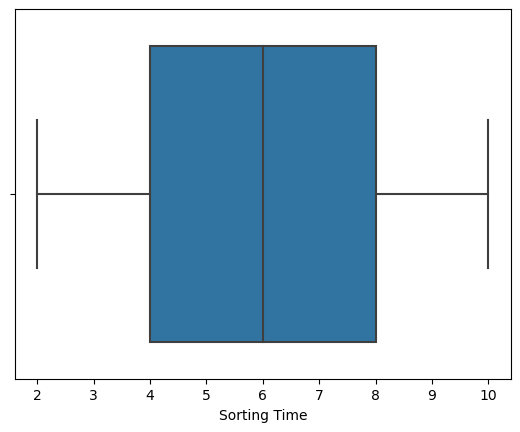

In [7]:
sns.boxplot(data["Sorting Time"])
plt.show()

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

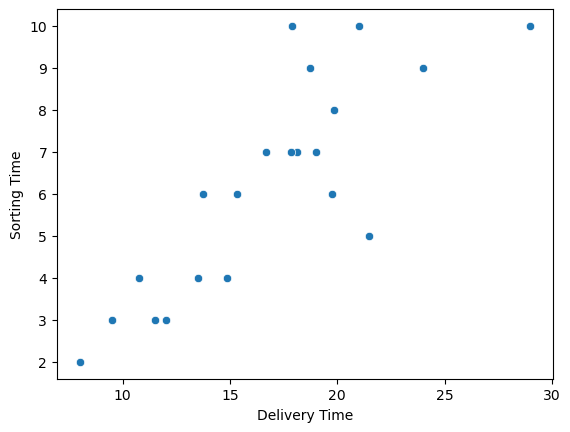

In [10]:
#plotting for dependent and independent variables 
sns.scatterplot(data.iloc[:,0],data.iloc[:,1])

In [11]:
#checking for any duplicated values 
data[data.duplicated()]

,Delivery Time,Sorting Time


In [12]:
data=data.rename({'Delivery Time':'dt', 'Sorting Time':'st'},axis=1)
data

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
data.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


<AxesSubplot:xlabel='st', ylabel='Density'>

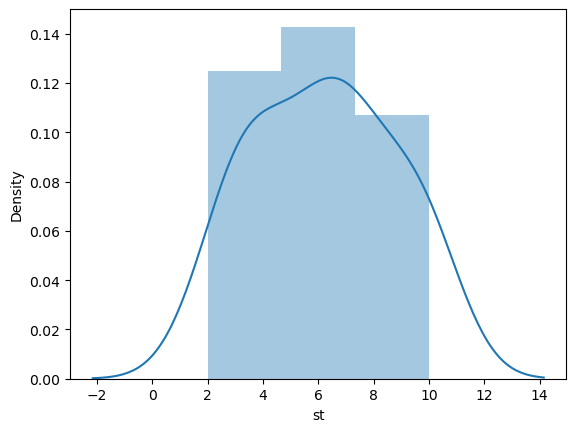

In [16]:
sns.distplot(data['st'])

<AxesSubplot:xlabel='dt', ylabel='Density'>

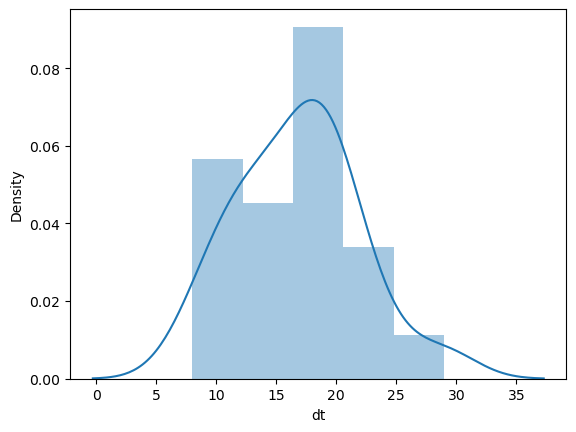

In [17]:
#checking for distribution of variables
sns.distplot(data['dt'])

In [19]:
#building model 
model_1 = smf.ols("dt~st",data = data).fit()

In [20]:
model_1.params

Intercept    6.582734
st           1.649020
dtype: float64

In [21]:
#checking p and t values 
print("t value",model_1.tvalues,"p value",model_1.pvalues)

t value Intercept    3.823349
st           6.387447
dtype: float64 p value Intercept    0.001147
st           0.000004
dtype: float64


In [22]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        11:50:34   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#computing are accuracy value 
print("r squared",model_1.rsquared,"adj r squared",model_1.rsquared_adj)

r squared 0.6822714748417231 adj r squared 0.6655489208860244


<AxesSubplot:xlabel='st', ylabel='dt'>

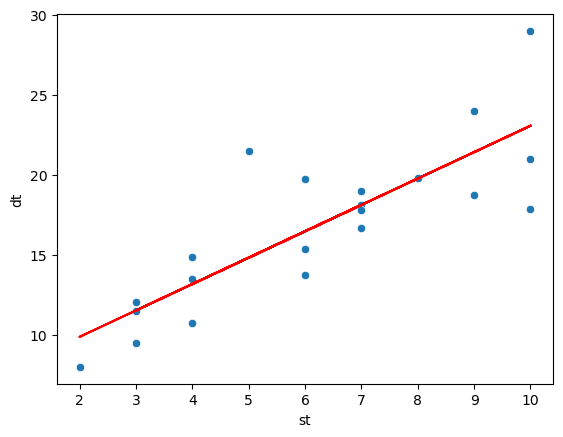

In [26]:
#plot of best line in the no transformation case
plt.plot(data.st,model_1.params[0]+model_1.params[1]*(data.st),"r")
sns.scatterplot(data.st,data.dt)

In [28]:
x = data.st
y = data.dt

In [30]:
#applying log transformation to only x
log_x = np.log(data.st)
data["log_x"] = log_x

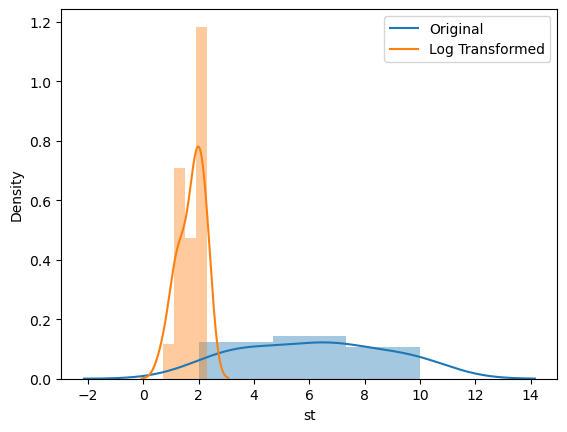

In [32]:
#plotting original and log transformed data
sns.distplot(x)
sns.distplot(log_x)
labels = ("Original","Log Transformed")
plt.legend(labels)

In [33]:
#applying log transformation to only y
log_y = np.log(data.dt)
data["log_y"] = log_y

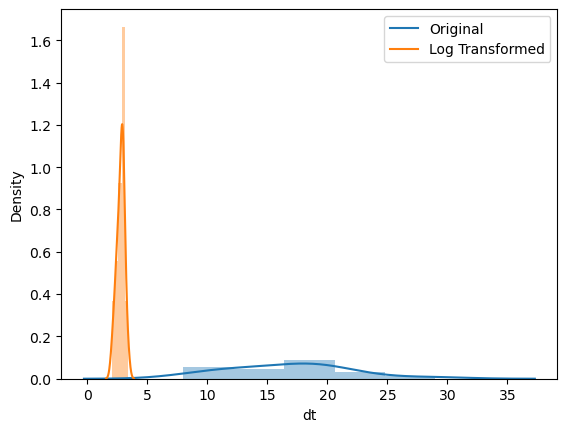

In [34]:
#plotting original and log transformed data
sns.distplot(y)
sns.distplot(log_y)
labels = ("Original","Log Transformed")
plt.legend(labels)

In [37]:
#building our model to check accuracy
model_2 = smf.ols("dt~st",data = data).fit()

<AxesSubplot:xlabel='st', ylabel='dt'>

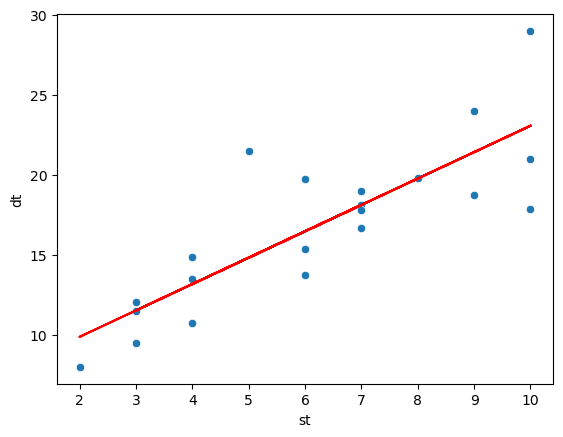

In [39]:
#plot of best line in the no transformation case
plt.plot(data.st,model_2.params[0]+model_2.params[1]*(data.st),"r")
sns.scatterplot(data.st,data.dt)

In [40]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        11:54:49   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#with log transformation with X and Y
#building a linear regression model 
model_3 = smf.ols("log_y~log_x",data = data).fit()

<AxesSubplot:xlabel='st', ylabel='dt'>

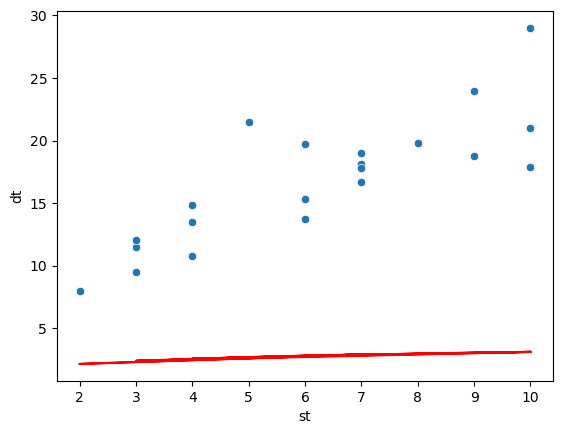

In [42]:
#plot of best line in the log transformation case
plt.plot(data.st,model_3.params[0]+model_3.params[1]*(log_x),"r")
sns.scatterplot(data.st,data.dt)

In [43]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.60e-07
Time:                        11:57:00   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
log_x          0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#applying square root transformation 
sq_x = np.sqrt(x)
data["sq_x"] = sq_x
sq_y = np.sqrt(y)
data["sq_y"] = sq_y


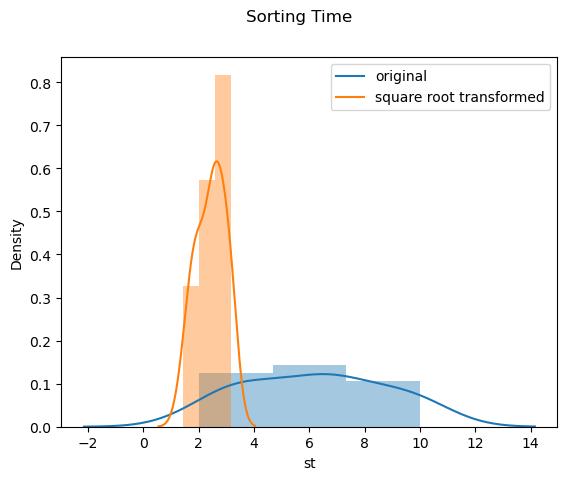

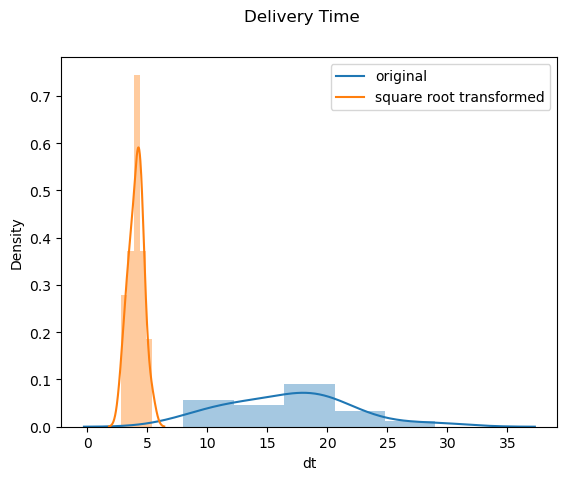

In [46]:
#plotting for original and square root transformed data
plt.subplots(1,1)
plt.suptitle("Sorting Time ")
sns.distplot(x)
sns.distplot(sq_x)
labels= ("original","square root transformed")
plt.legend(labels)
plt.subplots(1,1)
plt.suptitle("Delivery Time")
sns.distplot(y)
sns.distplot(sq_y)

labels = ("original","square root transformed")
plt.legend(labels)

<AxesSubplot:xlabel='st', ylabel='dt'>

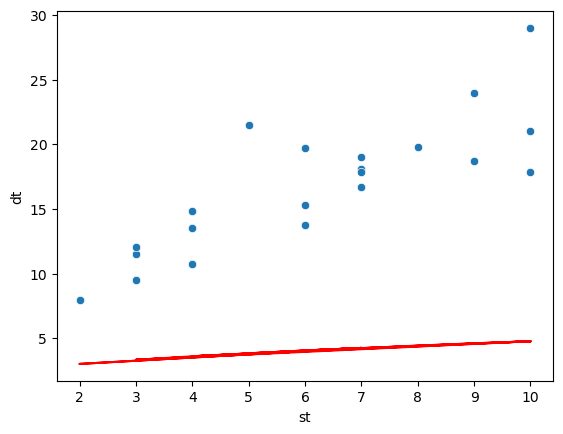

In [48]:
#building model for square root transformed variable
model_4 = smf.ols("sq_y~sq_x",data = data).fit()
#plot of best line in the square root transformation case
plt.plot(data.st,model_4.params[0]+model_4.params[1]*(sq_x),"r")
sns.scatterplot(data.st,data.dt)

In [49]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sq_y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           8.48e-07
Time:                        11:59:39   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
sq_x           1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#checking with square transformation
sqr_x = np.square(x)
data["sqr_x"] = sqr_x
sqr_y = np.square(y)
data["sqr_y"] = sqr_y

In [57]:
#building model with square transformed variable
model_5 = smf.ols("sqr_y~sqr_x",data = data).fit()

<AxesSubplot:xlabel='st', ylabel='dt'>

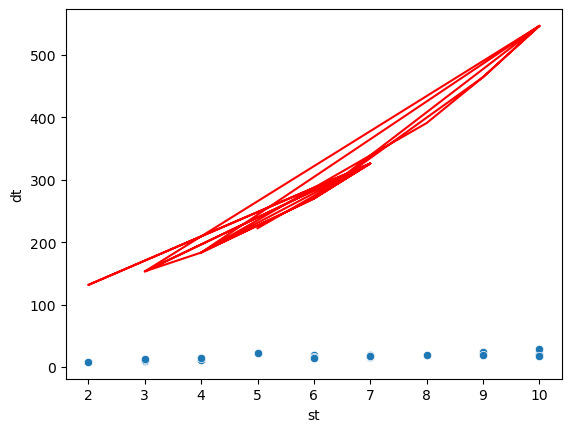

In [59]:
#plot of best line in the square transformation case
plt.plot(data.st,model_5.params[0]+model_5.params[1]*(sqr_x),"r")
sns.scatterplot(data.st,data.dt)

In [60]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sqr_y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     27.14
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           4.99e-05
Time:                        12:04:43   Log-Likelihood:                -129.24
No. Observations:                  21   AIC:                             262.5
Df Residuals:                      19   BIC:                             264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.1548     45.231      2.524      0.021      19.485     208.825
sqr_x          4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#with square transformation we have low accuracy of 58% out of all are transformation analysis the best model is log transformatio with higher accuracy predictions for delivery time
predictions for delivery time

In [62]:
#checking all are models and r squared 
d2 = {'Prep model':['model_1','model_2','model_3','model_4','model_5'],'Rsquared':[model_1.rsquared,
                                                                                   model_2.rsquared,
                                                                                  model_3.rsquared,
                                                                                  model_4.rsquared,
                                                                                  model_5.rsquared]}
table = pd.DataFrame(d2)
table

,Prep model,Rsquared
0,model_1,0.682271
1,model_2,0.682271
2,model_3,0.772161
3,model_4,0.729201
4,model_5,0.588188


In [63]:
#since model 3 is having the best accuracy we select that 
model_3.params

Intercept    1.741987
log_x        0.597522
dtype: float64

In [64]:
data.head()

,dt,st,log_x,log_y,sq_x,sq_y,sqr_x,sqr_y
0,21.00,10,2.302585,3.044522,3.162278,4.582576,100,441.0000
1,13.50,4,1.386294,2.602690,2.000000,3.674235,16,182.2500
2,19.75,6,1.791759,2.983153,2.449490,4.444097,36,390.0625
3,24.00,9,2.197225,3.178054,3.000000,4.898979,81,576.0000
4,29.00,10,2.302585,3.367296,3.162278,5.385165,100,841.0000


In [65]:
#predictions for our delivery time using sorting time
pred_log = model_3.predict(pd.DataFrame(data['st']))
pred_log

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [66]:
pred_2 = np.exp(pred_log)
pred_2

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64